## Model training and predictions - Classification with Dataset_2

In this script we trained a binary classification model using Dataset_2, where NRAS inhibitors were categorized as 0 or 1 based on their pIC50 values using a threshold of pIC50 < 7. This dataset incorporates negative molecules for NRAS, thereby increasing the molecular diversity.

In [1]:
import subprocess
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

### Train classificacion model 

To perform the model train we use: *train_class2.sh*

- **pIC50_class2.csv** : Dataset with total of 1570 compounds (578 have inhibitory activity against NRAS). 
- **--target_columns pIC50** : binary variable according to pIC50 (if pIC50 is greater than 7 it is classified with 1)
- **--features_generator rdkit_2d_normalized --no_features_scaling** : pre-normalized RDKit features
- **--save_smiles_splits** : By default, random split the data into 80% train, 10% validation, and 10% test. With these line we can save the three datasets used, to further study of the results obtained. The diferents dataset are stored in *'test_checkpoints_class/fold_0'* :

    - Train data : "train_full" (smiles + pIC50) / "train_smiles" (only smiles)
    - Validation data : "val_full" (smiles + pIC50) / "val_smiles" (only smiles)
    - Test data : "test_full" (smiles + pIC50) / "test_smiles" (only smiles)

The model is trained for 30 epochs.
The default metric for classification is AUC.

In [2]:
path = "./train_class2.sh"
subprocess.run(["sh",path])

Command line
python /Users/catalina/opt/anaconda3/bin/chemprop_train --data_path ../Data/Dataset_2.csv --dataset_type classification --save_dir test_checkpoints_class2 --target_columns pIC50 --features_generator rdkit_2d_normalized --no_features_scaling --save_smiles_splits
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': '../Data/Datase

CompletedProcess(args=['sh', './train_class2.sh'], returncode=0)

### Evaluate the model on test data.

Now that we have trained the model, the next step is to evaluate its performance on a test dataset (the split one).

With *train_pred_class2.sh* :

chemprop_predict \
    --test_path test_checkpoints_class2/fold_0/test_smiles.csv \
    --preds_path test_preds_class2.csv \
    --checkpoint_dir test_checkpoints_class2 \
    --features_generator rdkit_2d_normalized --no_features_scaling

- **test_preds_class2.csv** : predictions for the compounds in our test dataset

In [4]:
path = "./train_pred_class2.sh"
subprocess.run(["sh",path])

Loading training args
Setting molecule featurization parameters to default.
Loading data


157it [00:00, 86691.12it/s]
  0%|          | 0/1 [00:00<?, ?it/s]

Validating SMILES
Test size = 157
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [01:24<00:00, 84.66s/it]


Saving predictions to test_preds_class2.csv
Elapsed time = 0:01:45


CompletedProcess(args=['sh', './train_pred_class2.sh'], returncode=0)

### Test predictions representation

In [5]:
#load real pIC50 classification
df_true = pd.read_csv('test_checkpoints_class2/fold_0/test_full.csv')
print(df_true.columns)

Index(['SMILES', 'pIC50'], dtype='object')


In [6]:
#load predicted values
df_preds = pd.read_csv('test_preds_class2.csv')
print(df_preds.columns)

#column renaming to better manage data

df_preds.rename(columns={'pIC50': 'preds'}, inplace=True)
print(df_preds.columns)

Index(['SMILES', 'pIC50'], dtype='object')
Index(['SMILES', 'preds'], dtype='object')


In [7]:
#combination of the two data sets
df = df_true.merge(df_preds, on='SMILES', how='inner')

print(df)

                                                SMILES  pIC50     preds
0            O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc12    0.0  0.000085
1    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.164136
2    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.533126
3    CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.268319
4             Cc1nc2nonc2c(N)c1Cc1ccc(C#N)c(OCC(F)F)n1    0.0  0.002537
..                                                 ...    ...       ...
152  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    1.0  0.539299
153  CCn1c(c2CC(C)(C)COC(=O)[C@@H]3CCCN(N3)C(=O)[C@...    0.0  0.276657
154  C[C@@H]1CC[C@H](CN1C(=O)c1ccccc1OC(F)(F)F)n1nc...    0.0  0.001995
155  C[C@@H]1CCCN1CCCOc1ccc(cc1)-n1c(C)nc2ccc(cc2c1...    0.0  0.000042
156   CCc1cc(O)c(F)cc1-c1cc(NC2CCN(C)CC2)c2nc(N)ncc2c1    0.0  0.000653

[157 rows x 3 columns]


### ROC CURVE REPRESENTATION

ROC- AUC analysis for a classification model trained on NRAS inhibitors and negative molecules.

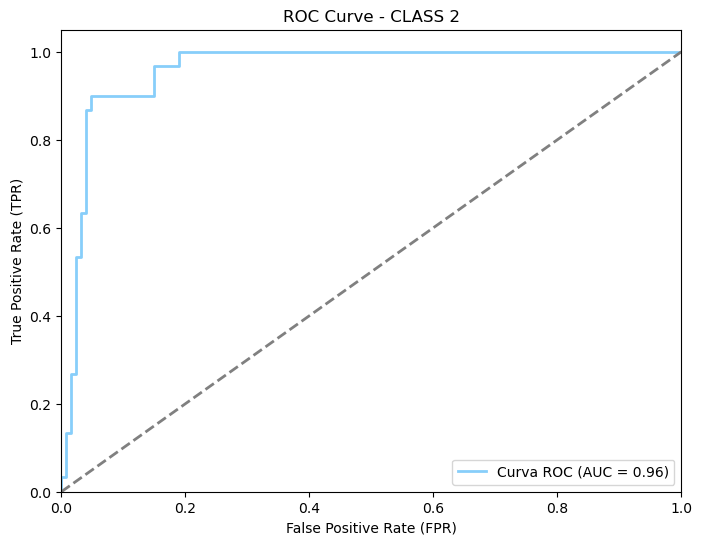

In [8]:
fpr, tpr, thresholds = roc_curve(df.pIC50, df.preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightskyblue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - CLASS 2')
plt.legend(loc='lower right')

plt.savefig('../Results/Figures/curva_roc_class2.png', dpi=300) # saving the plot

plt.show()
